# Component Characteristics Test
 In real world, sometimes, components specifications is not suitable with datasheets. For critical applications, we have to compare the results with components own specs. Verified components can be used with confidence as a replacement for the originally installed component.

## Zener Diode Voltage And Current Characteristics Test
 Zener diodes may critical role for different applications like clamping voltage, generating references, protecting inputs etc. At different temperatures, behaviour of zener may change. We need to draw the curves of leakage current and zener voltage. I've done a test for Nexperia PZU15B3 diode. We will measure Iz and Vz at different temperature points like -30°C, 25°C, 50°C, 100°C, 150°C. Comments belows drawings.

### Test Setup
 Test circuit drawn below this section. 
 All measurements and supplies applied with precise tools.

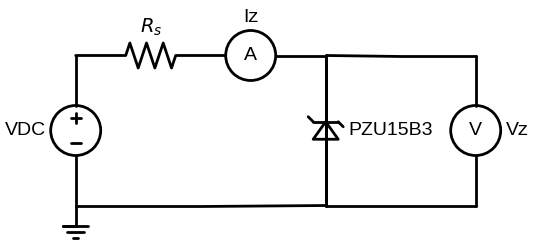

In [87]:
# Test Circuit Diagram
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing() as d:
    
    d += (V1 := elm.SourceV().label('VDC').up())
    d += elm.Resistor().right().label('$R_s$')
    d += (A1 := elm.MeterA().right(1).label('Iz'))
    d += elm.Line().right().length(1)
    d += elm.Line().down().length(3)
    d += (Z1 := elm.Zener().up().label('PZU15B3', loc='bottom'))
    d += elm.Line().down().length(2)
    d += elm.Line().right().at(Z1.start).length(3)
    d += elm.MeterV().up().label('Vz', loc='bottom')
    d += elm.Line().left().length(3)
    d += elm.Line().down().length(3)
    d += elm.Line().to(V1.start)
    d += elm.Ground().at(V1.start)
    d.draw()

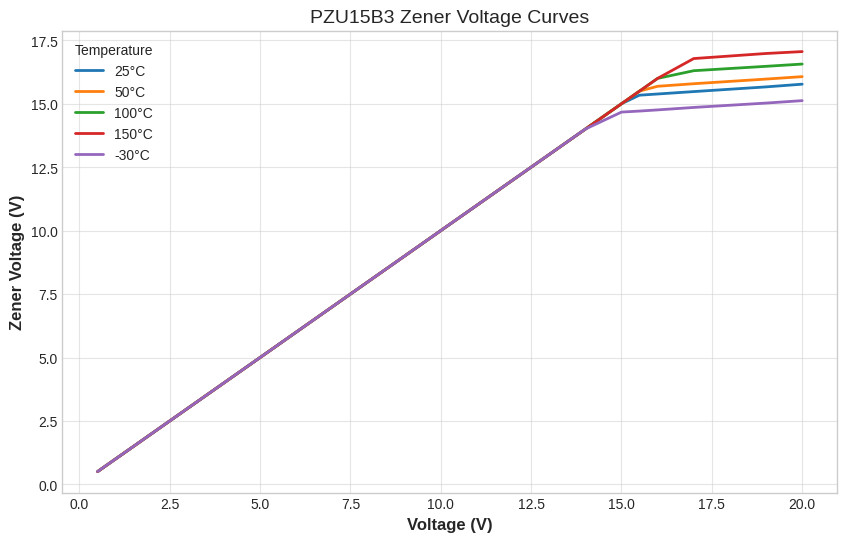

In [88]:
# Zener Voltage Curves Plotting
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('measurements.csv')

plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-whitegrid')

plt.plot(data['V_DC'], data['V_25C'], label='25°C', linewidth=2)
plt.plot(data['V_DC'], data['V_50C'], label='50°C', linewidth=2)
plt.plot(data['V_DC'], data['V_100C'], label='100°C', linewidth=2)
plt.plot(data['V_DC'], data['V_150C'], label='150°C', linewidth=2)
plt.plot(data['V_DC'], data['V_-30C'], label='-30°C', linewidth=2)

plt.title('PZU15B3 Zener Voltage Curves', fontsize=14)
plt.xlabel('Voltage (V)', fontsize=12, fontweight='bold')
plt.ylabel('Zener Voltage (V)', fontsize=12, fontweight='bold')
plt.legend(title="Temperature")
plt.grid(True, which="both", ls="-", alpha=0.5)

plt.show()

At 15.5V level, Zener starting to clamping voltage at 25°C. When temperature rise ups, voltage drifting getting higher. Vice versa, lowest clamping is at -30°C. This is to be expected. Common working temperatures usually between 25°C and 65°C, drawn curves are close in this range.

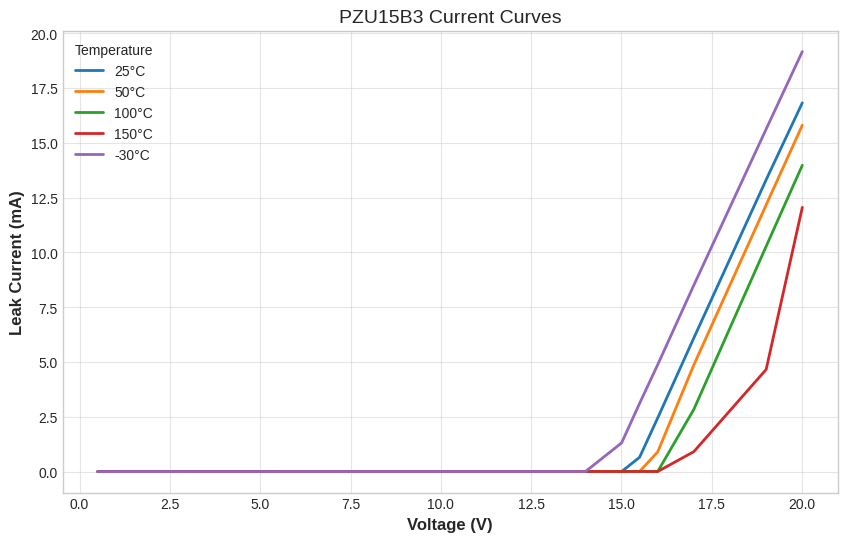

In [89]:
#Zener Current Curves Plotting
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('measurements.csv')

plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-whitegrid')

plt.plot(data['V_DC'], data['I_25C'], label='25°C', linewidth=2)
plt.plot(data['V_DC'], data['I_50C'], label='50°C', linewidth=2)
plt.plot(data['V_DC'], data['I_100C'], label='100°C', linewidth=2)
plt.plot(data['V_DC'], data['I_150C'], label='150°C', linewidth=2)
plt.plot(data['V_DC'], data['I_-30C'], label='-30°C', linewidth=2)

plt.title('PZU15B3 Current Curves', fontsize=14)
plt.xlabel('Voltage (V)', fontsize=12, fontweight='bold')
plt.ylabel('Leak Current (mA)', fontsize=12, fontweight='bold')
plt.legend(title="Temperature")
plt.grid(True, which="both", ls="-", alpha=0.5) 

plt.show()

We can observe same behaviour between 25°C and 50°C degrees in current curves. When temperatures is getting higher, leakage is increasing. At cold clamps early.